In [137]:
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler




import xlrd
import pandas as pd

book = xlrd.open_workbook('dataset for standardisation.xlsx')
sheet = book.sheet_by_name('Sheet1')
data_unreplicated = [[sheet.cell_value(r, c)
         for c in range(1,6)] for r in range(2,74)]
scaler = StandardScaler()
scaler.fit(data_unreplicated)


book = xlrd.open_workbook('generateddatakfold.xlsx')
sheet = book.sheet_by_name('Sheet1')
replicated_data = [[sheet.cell_value(r, c)
         for c in range(0,5)] for r in range(0,7800)]

standardised_data = scaler.transform(replicated_data)
array1 = standardised_data[:, 0:5]
array2 = standardised_data[:, 5:8]
x = torch.tensor(array1)
y = torch.tensor(array2)

def create_inout_sequences(input_data, tw):
    training_seq = []
    label_seq = []
    L = len(input_data)
    for i in range(0,L,13):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+1:i+tw+1,0:3]
        training_seq.append(train_seq)
        label_seq.append(train_label)
    return training_seq,label_seq
z, t = create_inout_sequences(x, 12)
training_seq = torch.stack(z)
label_seq = torch.stack(t)
batch_size = 4
train = torch.utils.data.TensorDataset(training_seq,label_seq)
train_loader = torch.utils.data.DataLoader(dataset=train,
                                           batch_size=batch_size, 
                                           shuffle=False)






In [1]:
import torch.nn as nn
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # Building your RNN
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='tanh')

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # One time step
        # We need to detach the hidden state to prevent exploding/vanishing gradients
        # This is part of truncated backpropagation through time (BPTT)
        out, hn = self.rnn(x, h0.detach())

        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out) 
        # out.size() --> 100, 10
        return out

In [2]:
import torch
input_dim = 5
hidden_dim = 20
layer_dim = 2  
output_dim = 3

model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)
loss_fn = torch.nn.MSELoss(reduction='mean')

In [140]:
from tqdm import tqdm
from torch.autograd import Variable
model.train()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epochs = 20

for epoch in range (epochs+1):
    for step, (x, y) in enumerate(train_loader):        # gives batch data
        b_x = Variable(x.view(-1, 12, 5))  
        b_y = Variable(y.view(-1, 12, 3))
    # Forward pass
        optimizer.zero_grad()
        y_pred = model(b_x.float())
    # Compute and print loss.
        loss = loss_fn(y_pred, b_y.float())
       
        loss.backward()
        optimizer.step()
        
    print(epoch, loss.item())



print(b_y)    
print(y_pred)


0 0.1345243752002716
1 0.015200591646134853
2 0.009968721307814121
3 0.009251229465007782
4 0.00948750413954258
5 0.009778295643627644
6 0.00962605606764555
7 0.009128818288445473
8 0.008577486500144005
9 0.008095814846456051
10 0.0073706922121346
11 0.007007830310612917
12 0.006793500855565071
13 0.006552017759531736
14 0.006320460699498653
15 0.006102955434471369
16 0.005892783869057894
17 0.0056998236104846
18 0.005542611703276634
19 0.005422468297183514
20 0.0052776639349758625
tensor([[[-1.3621e+00, -5.4791e-01, -1.2343e+00],
         [-1.1406e+00, -5.9286e-01, -1.0263e+00],
         [-9.4973e-01, -6.0550e-01, -7.5464e-01],
         [-6.6624e-01, -6.4224e-01, -4.3615e-01],
         [-2.7038e-01, -6.5537e-01, -1.6011e-01],
         [-3.1116e-02, -6.0183e-01,  2.3934e-01],
         [ 1.9655e-01, -5.1853e-01,  7.2352e-01],
         [ 5.5732e-01, -4.4501e-01,  9.1883e-01],
         [ 8.4371e-01, -3.5527e-01,  1.0133e+00],
         [ 1.0240e+00, -2.8155e-01,  1.1332e+00],
         [ 1.

In [141]:
torch.save(model.state_dict(), ("C:/Users/Gabriel/Documents/Python/RNN1.pt"))                
                                

In [3]:
import xlrd
import numpy as np
from sklearn.preprocessing import StandardScaler
model.load_state_dict(torch.load("C:/Users/Gabriel/Documents/Python/RNN1.pt"))
model.eval()
book = xlrd.open_workbook('dataset for standardisation.xlsx')
sheet = book.sheet_by_name('Sheet1')
data4 = [[sheet.cell_value(r, c)
         for c in range(1,6)] for r in range(2,74)]
data5 = [[sheet.cell_value(r, c)
         for c in range(1,4)] for r in range(2,74)]
scaler = StandardScaler()
scaler2 = StandardScaler()

In [4]:
book = xlrd.open_workbook('Experimental Data edited.xlsx')
sheet = book.sheet_by_name('Sheet2')
points_given=12
data = [[sheet.cell_value(r, c)
         for c in range(1,6)] for r in range(114,114+points_given)]
data3 = [[sheet.cell_value(r, c)
         for c in range(1,4)] for r in range(115,127)]
data2 = [[sheet.cell_value(r, c)
         for c in range(1,6)] for r in range(114,126)]
actual_results = torch.tensor(data3)

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(data4)
scaler2.fit(data5)
standardised_data = scaler.transform(data)
standardised_data_all = scaler.transform(data2)
test_data = torch.tensor(standardised_data)
test_data_all = torch.tensor(standardised_data_all)
sequenced_test_data_all = test_data_all.view(1,12,5)
sequenced_test_data = test_data.view(1,points_given,5)

for i in range (12-points_given):
    with torch.no_grad():
         data_pred = model(sequenced_test_data.float())
    predictions = np.array(data_pred)
    tensor_predictions= torch.tensor(predictions)

    prediction_added = torch.cat((sequenced_test_data.float()[:,:,0:3],
                              tensor_predictions[:,(points_given-1)+
                                                 i:points_given+i,:]),1)
    
    sequenced_test_data = torch.cat((prediction_added,
                               sequenced_test_data_all.float()
                                     [:,0:(points_given+1)+i,3:5]),2)
 
with torch.no_grad():
     data_pred = model(sequenced_test_data.float())
predictions = np.array(data_pred)
descaled_predictions = scaler2.inverse_transform(predictions)
usable_predictions = torch.tensor(descaled_predictions)
print(usable_predictions)
print(actual_results)
x_plot = usable_predictions.view (12,3)



tensor([[[2.7514e-01, 1.1314e+03, 6.0964e-01],
         [4.4311e-01, 8.9294e+02, 1.1045e+00],
         [6.6486e-01, 1.0091e+03, 1.5973e+00],
         [9.0662e-01, 9.5816e+02, 2.0789e+00],
         [1.1384e+00, 7.7225e+02, 2.5790e+00],
         [1.3762e+00, 9.3480e+02, 3.0841e+00],
         [1.6087e+00, 1.1036e+03, 3.4644e+00],
         [1.8572e+00, 1.0504e+03, 3.7922e+00],
         [2.1309e+00, 1.0187e+03, 4.1312e+00],
         [2.3363e+00, 1.0901e+03, 4.3876e+00],
         [2.4830e+00, 1.3530e+03, 4.6124e+00],
         [2.5668e+00, 1.5797e+03, 4.7471e+00]]])
tensor([[2.6670e-01, 7.2290e+02, 4.6200e-01],
        [4.5930e-01, 5.7480e+02, 7.7700e-01],
        [6.3910e-01, 5.1690e+02, 1.2180e+00],
        [8.7080e-01, 4.0420e+02, 1.8060e+00],
        [1.1327e+00, 3.3580e+02, 2.3520e+00],
        [1.3546e+00, 5.3840e+02, 2.7720e+00],
        [1.5643e+00, 8.1020e+02, 3.3180e+00],
        [1.7803e+00, 1.0283e+03, 3.9690e+00],
        [1.9670e+00, 1.2304e+03, 4.3680e+00],
        [2.1856e+00,

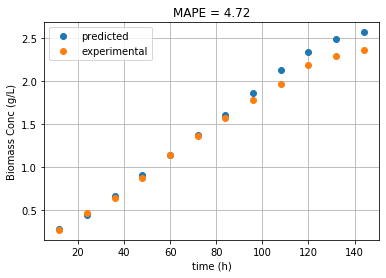

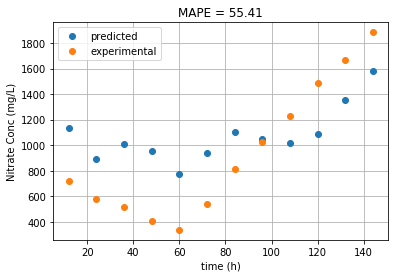

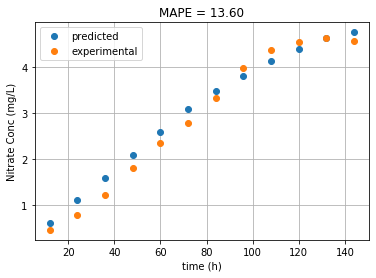

In [6]:
def MAPE(y_true, y_pred):
    MAPE_Total=0
    for i in range(len(y_pred)):
        MAPE = torch.abs((y_true[i:1+i,:]-y_pred[i:1+i,:])/y_true[i:1+i,:])
        MAPE_Total += (MAPE/len(y_pred))*100
    return MAPE_Total

import numpy as np
a = np.linspace(12,144,12)
v = torch.tensor(data3)
import matplotlib.pyplot as plt 
y1 = x_plot[:, 0:1] 
x1 = a
plt.plot(x1, y1,'o' ,label = "predicted") 

y2 = v[:, 0:1] 
x2 = a
plt.plot(x2, y2, 'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Biomass Conc (g/L)')
loss = MAPE(v[:, 0:1],x_plot[:, 0:1])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 


y1 = x_plot[:, 1:2] 
x1 = a
plt.plot(x1, y1,'o',label = "predicted") 

y2 = v[:, 1:2] 
x2 = a
plt.plot(x2, y2,'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Nitrate Conc (mg/L)')
loss = MAPE(v[:, 1:2],x_plot[:, 1:2])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 

y1 = x_plot[:, 2:3] 
x1 = a
plt.plot(x1, y1,'o',label = "predicted") 

y2 = v[:, 2:3] 
x2 = a
plt.plot(x2, y2,'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Lutein Conc (mg/L)')
loss = MAPE(v[:, 2:3],x_plot[:, 2:3])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 



In [27]:
import pandas as pd
b=np.array(v)
c=np.array(x_plot)
book = xlrd.open_workbook('tested data.xlsx')
sheet = book.sheet_by_name('Sheet1')
writer = pd.ExcelWriter('tested data.xlsx', engine='xlsxwriter')
df1 = pd.DataFrame(b)
df1.to_excel(writer, header=True, index=True)
df2 = pd.DataFrame(c)
df2.to_excel(writer, startrow=13, header=True, index=True)
writer.save()